# Word Embedding Methods
The different types of word embeddings can be broadly classified into two categories:

<b>Frequency based Embedding:</b>
* Count Vector
* TF-IDF Vector
* Co-Occurrence Vector
* Global Vectors (GloVe) (Stanford, 2014): factorizes the logarithm of the corpus's word co-occurrence matrix,  similar to the count matrix you’ve used before.

<b>Prediction based Embedding:</b>
* Continuous bag-of-words (CBOW): the model learns to predict the center word given some context words.
* Continuous skip-gram / Skip-gram with negative sampling (SGNS): the model learns to predict the words surrounding a given input word.
* fastText (Facebook, 2016): based on the skip-gram model and takes into account the structure of words by representing words as an n-gram of characters. It supports out-of-vocabulary (OOV) words.

<b>Deep learning, contextual embeddings:</b>
* BERT (Google, 2018):
* ELMo (Allen Institute for AI, 2018)
* GPT-2 (OpenAI, 2018)



# Frequency Based Embedding

## Count Vector

Count vector summerizes word occurance with respect to each document.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

document = ["Python is a great Language and this is Python Code",
            "Natural Lanugage Processing with Python is easy",
            "Count Vector is a Natural Lanugage Processing method"]
# Create a Vectorizer Object
vectorizer = CountVectorizer()
vectorizer.fit(document)
vector = vectorizer.transform(document)

In [ ]:
vectorizer.vocabulary_.keys()

In [ ]:
count_vector = pd.DataFrame(columns=vectorizer.get_feature_names(),
             index=list(range(len(document))))

count_vector.loc[:, :] = vector.toarray()


In [ ]:
count_vector


The index of above matrix is number of documents and the columns are unique words (features) in the document. 

## TF-IDF

TF-IDF is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general. 

$$ TF-IDF = Term \quad Frequency \quad\times\quad Inverse \quad Document  \quad Frequency$$

### Term Frequency

TF measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

$$TF(t) = \frac{Count(term,document)} {Count(all \ terms, document)}$$

### Inverse Document Frequency

IDF measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

$$IDF(t) = log_e(\frac{Total\ number\ of\ documents}{Number\ of\ documents\ with\ term\ t \ in \ it}) $$

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vectorizer = TfidfVectorizer()
tf_vector = tf_vectorizer.fit_transform(document)


In [ ]:
tf_idf = pd.DataFrame(columns=tf_vectorizer.get_feature_names(),
                            index=list(range(len(document))))

tf_idf.loc[:, :] = tf_vector.todense()


In [ ]:
tf_idf


As it can be seen, for example the first document weights Python heavily using TF-IDF.

## Co-Occurrence Matrix with a fixed context window

Co-Occurrence frequency of occurrence of two terms (also known as coincidence or concurrence) from a text corpus alongside each other in a certain order. Similar words tend to occur together and will have similar context for example – Apple is a fruit. Mango is a fruit.

In [ ]:
count_model = CountVectorizer()
X = count_model.fit_transform(document)
Xc = (X.T * X) 
Xc.setdiag(0) 
co_occurrence=pd.DataFrame(columns=count_model.get_feature_names(),index=count_model.get_feature_names())
co_occurrence.loc[:,:]=Xc.todense()
co_occurrence

# Prediction Based Embedding

Prediction based methods are supervised learning methods using models such as the neural network models. 

## Continuous Bag of words (CBOW)

<b>The bag-of-words model</b> is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity.

The CBOW model architecture tries to predict the current target word (the center word) based on the source context words (surrounding words). Considering a simple sentence, “the quick brown fox jumps over the lazy dog”, this can be pairs of (context_window, target_word) where if we consider a context window of size 2, we have examples like ([quick, fox], brown), ([the, brown], quick), ([the, dog], lazy) and so on. Thus the model tries to predict the target_word based on the context_window words.




## Continuous Skip-Gram 

Skip-gram model reverses the use of target and context words. In this case, the target word is fed at the input, the hidden layer remains the same, and the output layer of the neural network is replicated multiple times to accommodate the chosen number of context words. 

## Word2Vec

Word2vec is a two-layer neural net that processes text by “vectorizing” words. Its input is a text corpus and its output is a set of vectors: feature vectors that represent words in that corpus. While Word2vec is not a deep neural network, it turns text into a numerical form that deep neural networks can understand. The vectors we use to represent words are called neural word embeddings, and representations are strange. Word2vec is similar to an autoencoder, encoding each word in a vector, but rather than training against the input words through reconstruction, as a restricted Boltzmann machine does, word2vec trains words against other words that neighbor them in the input corpus.

It does so in one of two ways, either using context to predict a target word (a method known as continuous bag of words, or CBOW), or using a word to predict a target context, which is called skip-gram. We use the latter method because it produces more accurate results on large datasets.

In [101]:
# Example newsgroup data embedding using Word2Vec
# based on: https://stackoverflow.com/questions/40581010/how-to-run-tsne-on-word2vec-created-from-gensim
from sklearn.datasets import fetch_20newsgroups
import re
from gensim.models.word2vec import Word2Vec
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
plt.style.use('ggplot')

In [37]:
categories = ['alt.atheism', 'soc.religion.christian','comp.graphics', 'sci.med']
data = fetch_20newsgroups(subset='train',categories=categories, 
                        shuffle=True, remove=('headers', 'footers', 'quotes'),random_state=42)['data']


In [40]:
def clean(text):
    # Remove posting header, split by sentences and words, keep only letters
    lines = re.split('[?!.:]\s', re.sub('^.*Lines: \d+', '', re.sub('\n', ' ', text)))
    return [re.sub('[^a-zA-Z]', ' ', line).lower().split() for line in lines]

In [41]:
sentences = [line for text in data for line in clean(text)]

In [137]:
model = Word2Vec(min_count=20,
                     window=2,
                     size=300,
                     sample=6e-5, 
                     alpha=0.03, 
                     min_alpha=0.0007, 
                     negative=20,
                     workers=-1)

In [138]:
model.build_vocab(sentences, progress_per=10000)

In [139]:
model.train(sentences, total_examples=model.corpus_count, epochs=30, report_delay=1)

(0, 0)

In [140]:
model.init_sims(replace=True)

In [141]:
text = ''.join(data)
text=re.sub("[^-9A-Za-z ]","",text)
tokenized_word=word_tokenize(text)
stop_words = set(stopwords.words("english"))
filtered_sent = []
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)


fdist = FreqDist(filtered_sent)
list(filter(lambda x: x[1]>=300, fdist.items()))

[('anyone', 309),
 ('know', 739),
 ('good', 470),
 ('way', 416),
 ('would', 1251),
 ('also', 639),
 ('like', 672),
 ('I', 5146),
 ('The', 1641),
 ('If', 709),
 ('may', 528),
 ('people', 850),
 ('need', 312),
 ('something', 322),
 ('want', 324),
 ('It', 778),
 ('even', 421),
 ('find', 359),
 ('This', 563),
 ('believe', 491),
 ('make', 338),
 ('dont', 796),
 ('-', 1361),
 ('could', 437),
 ('must', 369),
 ('say', 492),
 ('God', 995),
 ('much', 441),
 ('many', 458),
 ('one', 1167),
 ('used', 307),
 ('--', 10076),
 ('well', 319),
 ('Im', 420),
 ('time', 563),
 ('us', 389),
 ('He', 508),
 ('said', 357),
 ('point', 319),
 ('question', 321),
 ('think', 684),
 ('You', 303),
 ('A', 480),
 ('see', 469),
 ('use', 505),
 ('In', 403),
 ('But', 451),
 ('image', 387),
 ('things', 327),
 ('two', 303),
 ('get', 526),
 ('9', 560),
 ('Jesus', 484)]

In [142]:
model.wv.most_similar(positive=["christian"])

[('saint', 0.22147919237613678),
 ('release', 0.20447072386741638),
 ('view', 0.16311877965927124),
 ('costs', 0.16141077876091003),
 ('he', 0.16013425588607788),
 ('structure', 0.15970243513584137),
 ('bishop', 0.15709733963012695),
 ('posted', 0.1542978286743164),
 ('email', 0.1516626924276352),
 ('tape', 0.14967963099479675)]

In [143]:
model.wv.most_similar(positive=["bible"])

[('mary', 0.18129846453666687),
 ('out', 0.17661985754966736),
 ('syndrome', 0.17215846478939056),
 ('berkeley', 0.17002619802951813),
 ('shouldn', 0.16992515325546265),
 ('versions', 0.16825413703918457),
 ('soon', 0.1679222732782364),
 ('designed', 0.16726374626159668),
 ('cards', 0.16501404345035553),
 ('requests', 0.16483446955680847)]

/home/nejada/anaconda3/envs/tf_2x/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


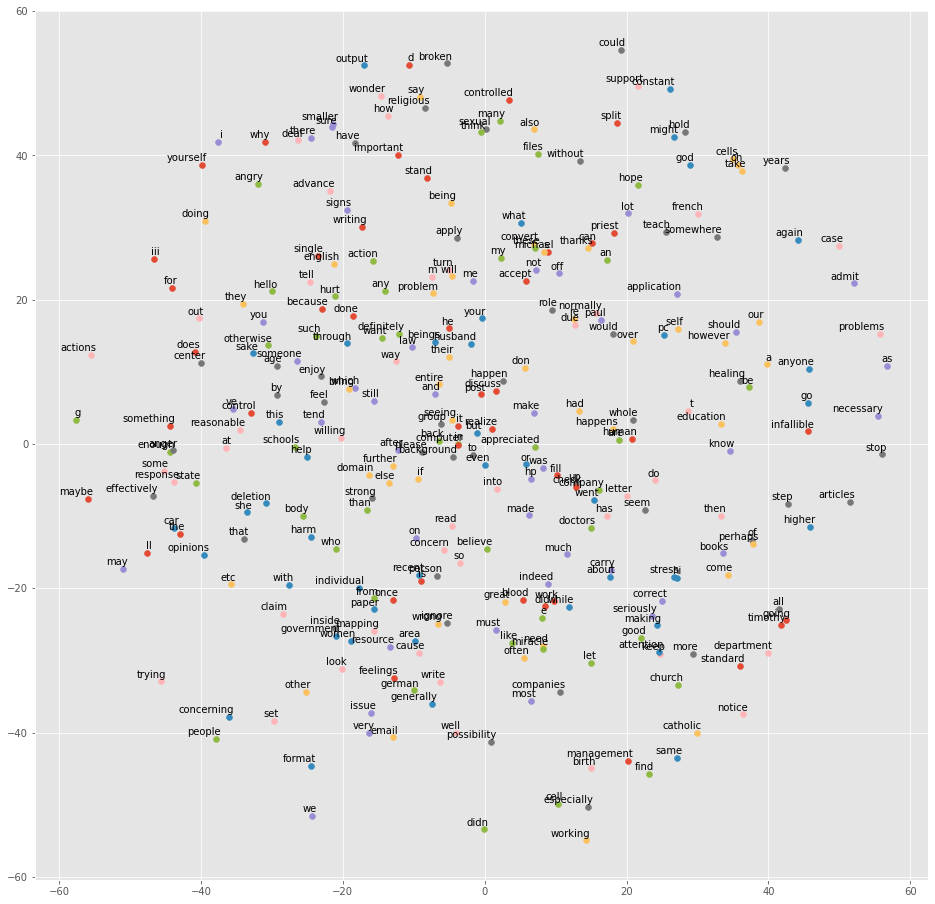

In [144]:
# based on https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne
labels = []
tokens = []

for word in model.wv.vocab:
    tokens.append(model[word])
    labels.append(word)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=42)
new_values = tsne_model.fit_transform(tokens)
# only selecting 300 values for plotting purposes
new_values=new_values[:300]
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])
    
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
                    xy=(x[i], y[i]),
                    xytext=(5, 2),
                    textcoords='offset points',
                    ha='right',
                    va='bottom')
plt.show()